In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # для работы с таблицами

In [3]:
df = pd.read_csv('BostonHousing_raw.csv', # путь к файлу, (используй автодотолнение)
                   sep=',', # разделитель данных в файле
                   header=0, # номер строки с заголовками, нумерация с нуля
                   # header='None', # если заголовки отсутствуют
                  )
print("Размер таблицы", df.shape)
df[:2]

Размер таблицы (506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [4]:
df = df.dropna()
print("Размер таблицы:", df.shape)

Размер таблицы: (506, 14)


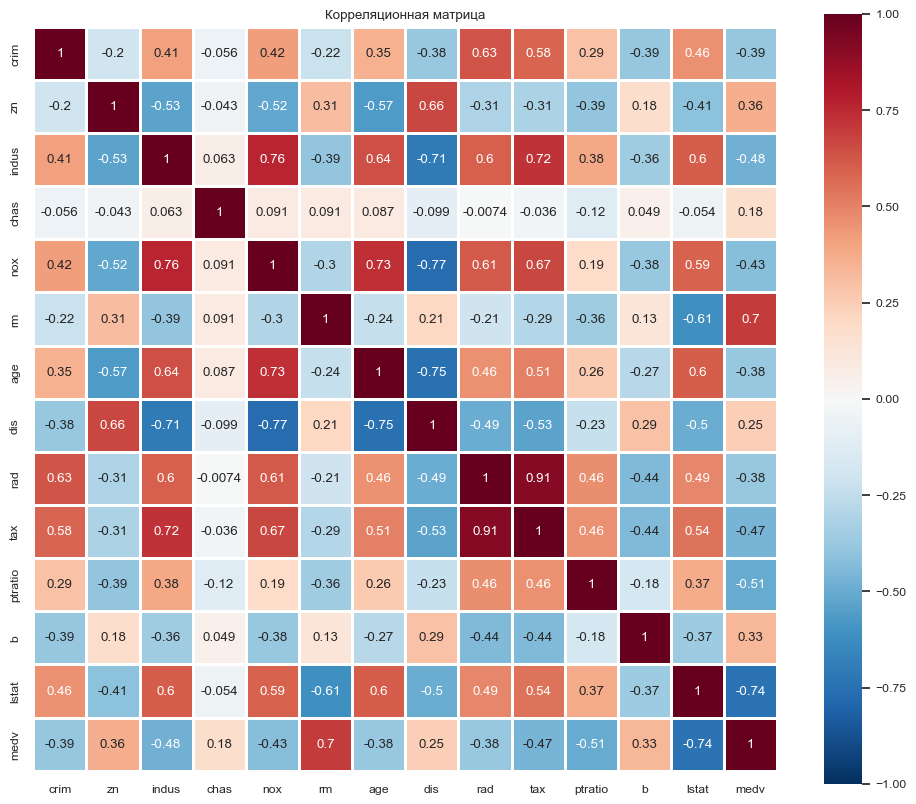

In [5]:
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(12, 10)) # размер окна в дюймах
sns.set(font_scale=0.8) # размер шрифта
sns.heatmap(
            data=corr_matrix,
            vmin=-1, vmax=1, center=0,
            annot=True,
            cmap = 'RdBu_r',
            square=True, # форма ячейки - квадрат
            linewidths=1.0, # зазор между ячейки
           )
plt.title('Корреляционная матрица')
plt.show()

In [6]:
corrmatrix = df.corr()["medv"].abs().sort_values(ascending=False)
print(corrmatrix)

medv       1.000000
lstat      0.737663
rm         0.695360
ptratio    0.507787
indus      0.483725
tax        0.468536
nox        0.427321
crim       0.388305
rad        0.381626
age        0.376955
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
Name: medv, dtype: float64


In [7]:
t = 0.4
selected_features = corrmatrix[corrmatrix >= t].index.tolist()[1:]
print(selected_features)

['lstat', 'rm', 'ptratio', 'indus', 'tax', 'nox']


In [8]:
from sklearn.model_selection import train_test_split
x = df[selected_features]
y = df['medv'] # Целевое значение (цена дома)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Модель линейной регрессии
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred_lin = lin_reg.predict(x_test)

# Модель полиномиальной регрессии (степень 2)
poly_reg_2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg_2.fit(x_train, y_train)
y_pred_poly_2 = poly_reg_2.predict(x_test)

# Модель полиномиальной регрессии (степень 3)
poly_reg_3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_reg_3.fit(x_train, y_train)
y_pred_poly_3 = poly_reg_3.predict(x_test)

# Ридж-регрессия
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)

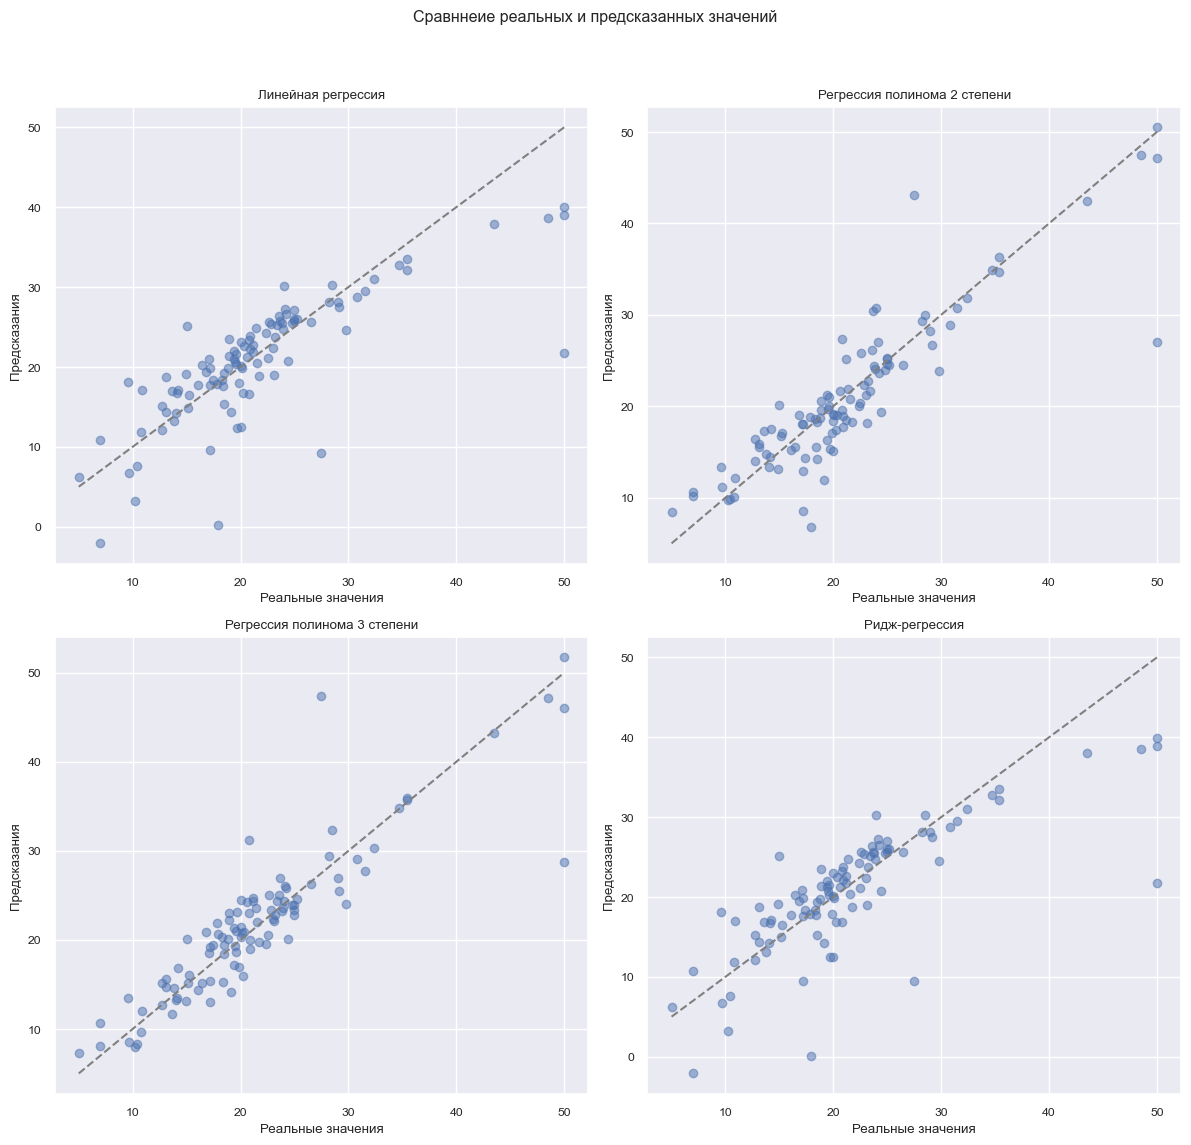

In [10]:
import matplotlib.pyplot as plt

models = [
    ('Линейная регрессия', y_pred_lin),
    ('Регрессия полинома 2 степени', y_pred_poly_2),
    ('Регрессия полинома 3 степени', y_pred_poly_3),
    ('Ридж-регрессия', y_pred_ridge)
]

# Показ реальных и прогнозируемых значений
plt.figure(figsize=(12, 12))

for i, (name, predictions) in enumerate(models):
    plt.subplot(2, 2, i+1)
    plt.scatter(y_test, predictions, alpha=0.5) # создание рассеянного графика
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray')
    plt.title(name)
    plt.xlabel('Реальные значения')
    plt.ylabel('Предсказания')

plt.suptitle('Сравннеие реальных и предсказанных значений')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [12]:
# Получение уравнения линейной регрессии
lin_coef = lin_reg.coef_ #коэффициент (наклон) линейной регрессии
lin_intercept = lin_reg.intercept_ #свободный член
print(f'Линейное уравнение: y = {lin_coef[0]:.2f}*x + {lin_intercept:.2f}')

# Получение уравнения ридж-регрессии
ridge_coef = ridge_reg.coef_
ridge_intercept = ridge_reg.intercept_
print(f'Ридж-уравнение: y = {ridge_coef[0]:.2f}*x + {ridge_intercept:.2f}')

# Получение уравнения полиномиальной регрессии 2 степени
poly_reg_2_coef = poly_reg_2.named_steps['linearregression'].coef_
poly_reg_2_intercept = poly_reg_2.named_steps['linearregression'].intercept_
print(f'Полиномиальное уравнение второго порядка: y = {poly_reg_2_coef[0]:.2f}*x^2 + {poly_reg_2_coef[1]:.2f}*x + {poly_reg_2_intercept:.2f}')

# Получение уравнения полиномиальной регрессии 3 степени
poly_reg_3_coef = poly_reg_3.named_steps['linearregression'].coef_
poly_reg_3_intercept = poly_reg_3.named_steps['linearregression'].intercept_
print(f'Полиномиальное уравнение третьего порядка: y = {poly_reg_3_coef[0]:.2f}*x^3 + {poly_reg_3_coef[1]:.2f}*x^2 + {poly_reg_3_coef[2]:.2f}*x + {poly_reg_3_intercept:.2f}')

Линейное уравнение: y = -0.55*x + 14.38
Ридж-уравнение: y = -0.55*x + 14.21
Полиномиальное уравнение второго порядка: y = -0.00*x^2 + -1.02*x + -217.12
Полиномиальное уравнение третьего порядка: y = -0.09*x^3 + 29.01*x^2 + 91.59*x + -966.41


In [13]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Оценка точности каждой модели
for name, predictions in models:
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)
    
    print(f'{name}:')
    print(f'  R²: {r2:.4f}')
    print(f'  MSE: {mse:.4f}')
    print(f'  RMSE: {rmse:.4f}')
    print(f'  MAE: {mae:.4f}')

Линейная регрессия:
  R²: 0.6210
  MSE: 27.7968
  RMSE: 5.2723
  MAE: 3.3543
Регрессия полинома 2 степени:
  R²: 0.7782
  MSE: 16.2667
  RMSE: 4.0332
  MAE: 2.5363
Регрессия полинома 3 степени:
  R²: 0.7975
  MSE: 14.8522
  RMSE: 3.8539
  MAE: 2.4048
Ридж-регрессия:
  R²: 0.6214
  MSE: 27.7641
  RMSE: 5.2692
  MAE: 3.3460


In [16]:
# Создание нового DataFrame
df_results = pd.DataFrame({
    'Настоящие значения': y_test,
    'Линейная регрессия': y_pred_lin,
    'Полином 2 степени': y_pred_poly_2,
    'Полином 3 степени': y_pred_poly_3,
    'Ридж-регрессия': y_pred_ridge
})

# Вывод нового датасета
print(df_results.head(10))

df_results.to_csv('results.csv', index=False)

     Настоящие значения  Линейная регрессия  Полином 2 степени  \
173                23.6           26.374950          26.161440   
274                32.4           30.976040          31.866833   
491                13.6           17.045773          17.343420   
72                 22.8           25.413005          22.368100   
452                16.1           17.739026          15.179799   
76                 20.0           23.159364          19.114098   
316                17.8           17.820280          18.811151   
140                14.0           14.288534          13.298274   
471                19.6           20.318488          21.043854   
500                16.8           19.381324          19.020519   

     Полином 3 степени  Ридж-регрессия  
173          25.060719       26.416097  
274          30.355746       30.960227  
491          11.672742       16.876065  
72           23.326452       25.346554  
452          14.391628       17.777304  
76           24.491380     